# Inaugural Project 2024



**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)
- 3. [Questions](#toc3_)
	- 3.1 [Question 1](#toc3_1_)
	- 3.2 [Question 2](#toc3_2_)
	- 3.3 [Question 3](#toc3_3_)
	- 3.4 [Question 4](#toc3_4_)
	- 3.4.1 [Question 4a](#toc3_4_1_) 
	- 3.4.2 [Question 4b](#toc3_4_2_)  
	- 3.5 [Question 5](#toc3_5_)
	- 3.5.1 [Question 5a](#toc3_5_1_)    
	- 3.5.2 [Question 5b](#toc3_5_2_)       
	- 3.6 [Question 6](#toc3_6_)
	- 3.6.1 [Question 6a](#toc3_6_1_)  
	- 3.6.2 [Question 6b](#toc3_6_2_) 
	- 3.7 [Question 7](#toc3_7_)
	- 3.8 [Question 8](#toc3_8_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np
#test
from InauguralProject import InauguralProjectClass

# Import optimize and minimize from scipy for question 5
from scipy import optimize
from scipy.optimize import minimize

# Import for question 7
from scipy.optimize import fsolve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [15]:
model = InauguralProjectClass()


### 3. <a id='toc2_1_'></a>[Answers to questions](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1](#toc0_)

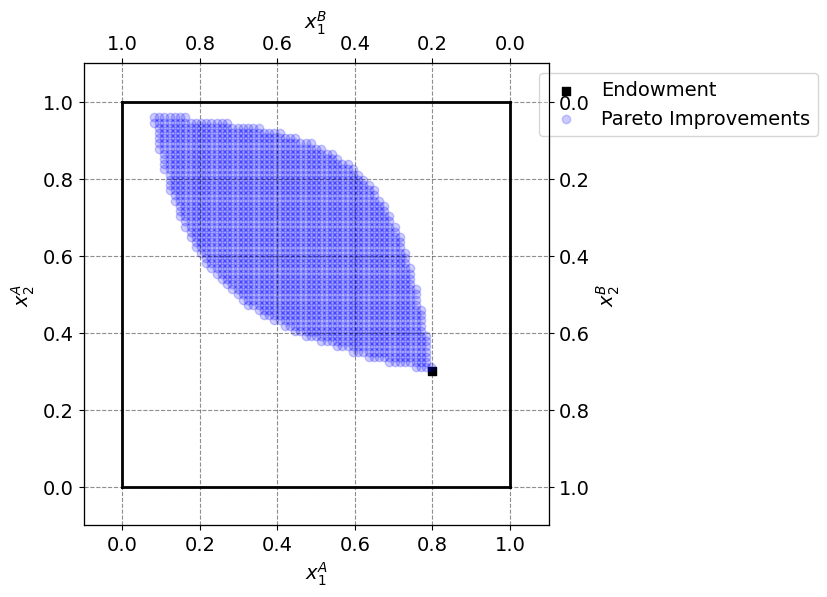

In [16]:
# Initialize model
par = model.par

# We calculate the initial utilities
U_A_initial = model.utility_A(par.w1A, par.w2A)
U_B_initial = model.utility_B(par.w1B, par.w2B)

# Generate grid for x1A and x2A
N = 75
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Pareto improvements grid
pareto_improvements = np.zeros(x1A_grid.shape, dtype=bool)

# Checking for Pareto improvements
for i in range(N):
    for j in range(N):
        x1A = x1A_grid[i,j]
        x2A = x2A_grid[i,j]
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= U_A_initial and model.utility_B(x1B, x2B) >= U_B_initial:
            pareto_improvements[i,j] = True


# Plotting setup (using the given code for a basic Edgeworth box)
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A's endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# Pareto improvements
ax_A.scatter(x1A_grid[pareto_improvements], x2A_grid[pareto_improvements], color='blue', alpha=0.2, label='Pareto Improvements')

# Limits
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6,1.0))

plt.show()


### 3.2. <a id='toc3_2_'></a>[Question 2](#toc0_)

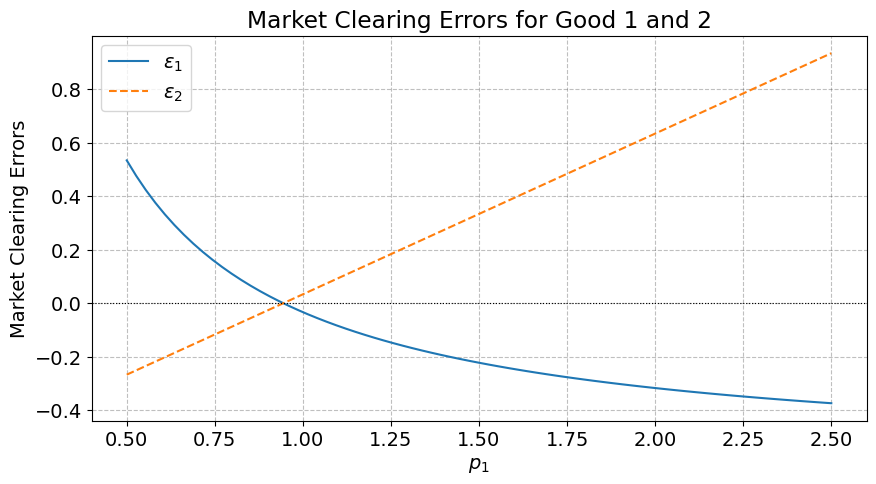

In [17]:
eps1_values = []
eps2_values = []

# Given the information from the question, we set up the range from 0.5 to 2.5 with N = 75
p1_values = np.linspace(0.5, 2.5, 75)

for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)
    
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(p1_values, eps1_values, label='$\epsilon_1$')
plt.plot(p1_values, eps2_values, label='$\epsilon_2$', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Errors')
plt.legend()
plt.title('Market Clearing Errors for Good 1 and 2')
plt.show()


### 3.3. <a id='toc3_3_'></a>[Question 3](#toc0_)

In [18]:
# We convert the list of errors to a numpy array
eps1_values = np.array(eps1_values)

# We find the index of the minimum absolute error
min_error_index = np.argmin(np.abs(eps1_values))

# We find the corresponding p1 value for the minimum absolute error
market_clearing_price = p1_values[min_error_index]

print(f"The market clearing price p1 is {market_clearing_price:.4f}")


The market clearing price p1 is 0.9324


### 3.4. <a id='toc3_4_'></a>[Question 4](#toc0_)

### 3.4.1. <a id='toc3_4_1_'></a>[Question 4a](#toc0_)

In [19]:
max_utility = -np.inf  # Initialize maximum utility to negative infinity
optimal_p1 = None  # Placeholder for the optimal p1 value

# We use p1_values that we defined in question 2
for p1 in p1_values:
    # Calculate demands for consumer A at this p1
    x1A, x2A = model.demand_A(p1)
    
    # Calculate utility for A given these demands
    utility_A = model.utility_A(x1A, x2A)
    
    # If this utility is higher than the current maximum, update max_utility and optimal_p1
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_p1 = p1

print(f"The optimal value of p1 is {optimal_p1} and the maximum utility for consumer A is {max_utility:.4f}")


The optimal value of p1 is 2.5 and the maximum utility for consumer A is 0.8967


### 3.4.2. <a id='toc3_4_1_'></a>[Question 4b](#toc0_)

In [20]:
# We define the objective function to be minimized (negative utility for maximization)
def objective_4b(p1):
    x1A, x2A = model.demand_A(p1[0]) 
    return -model.utility_A(x1A, x2A)  # Minimize negative utility to maximize utility

# Define bounds for p1 (assuming p1 > 0).
bounds_4b = [(0, None)]

# Initial guess for p1
initial_guess_4b = [1]

# Run the optimization
result = minimize(objective_4b, initial_guess_4b, bounds=bounds_4b)

# Check if the optimization was successful
if result.success:
    optimal_p1_continuous = result.x[0]  # Optimal p1
    optimal_utility = -result.fun  # Maximal utility (negative because we minimized negative utility)
    print(f"The optimal continuous p1 is {optimal_p1_continuous: .4f} and the maximum utility for consumer A is {optimal_utility: .4f}")
else:
    print("Optimization was not successful", result.message)


The optimal continuous p1 is  30200707349075.5195 and the maximum utility for consumer A is  410519198.8474


For question 4b: Seems like a wrong result.

### 3.5. <a id='toc3_5_'></a>[Question 5](#toc0_)

### 3.5.1 <a id='toc3_5_1_'></a>[Question 5a](#toc0_)

In [21]:
# Objective function to be maximized (negative for minimization)
def objective_5a(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)  # We minimize the negative utility

# Constraint ensuring both A and B are at least as well off as with their endowments
constraints_5a = [
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - U_A_initial},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - U_B_initial}
]

# Bounds for x1A and x2A
bounds_5a = [(0, 1), (0, 1)]

# Initial guess for the allocation
initial_guess_5a = [par.w1A, par.w2A]

# Run the optimization
result = minimize(objective_5a, initial_guess_5a, bounds=bounds_5a, constraints=constraints_5a)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility_A = -result.fun  # Convert back to positive for utility
    print(f"The optimal allocation for consumer A is x1A = {optimal_x1A:.4f} and x2A = {optimal_x2A:.4f} which yields the utility {optimal_utility_A:.4f}")
else:
    print("The optimization was not successful", result.message)


The optimal allocation for consumer A is x1A = 0.5757 and x2A = 0.8444 which yields the utility 0.7432


### 3.5.2. <a id='toc3_5_2_'></a>[Question 5b](#toc0_)

In [22]:
# We set the optimization objective
def objective_5b(x):
    return -model.utility_A(*x)

# Update the constraints to focus on consumer B not being worse off
constraints_5b = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - U_B_initial} # B is not worse off
]

# Bounds for x1A and x2A
bounds_5b = [(0, 1), (0, 1)]

# Initial guess for the allocation
initial_guess_5b = [par.w1A, par.w2A]

# Perform the optimization with the updated constraint
result = minimize(objective_5b, initial_guess_5b, bounds=bounds_5b, constraints=constraints_5b)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility_A = -result.fun # Converting back to positive for utility
    print(f"The optimal allocation for A under 5b is x1 = {optimal_x1A:.4f} and x2 = {optimal_x2A:.4f}")
    print(f"The maximized utility for A under 5b is {model.utility_A(optimal_x1A, optimal_x2A):.4f}")
else:
    print("Optimization was unsuccessful under 5b")
    

The optimal allocation for A under 5b is x1 = 0.5757 and x2 = 0.8444
The maximized utility for A under 5b is 0.7432


### 3.6. <a id='toc3_5_2_'></a>[Question 6](#toc0_)

### 3.6.1. <a id='toc3_5_2_'></a>[Question 6a](#toc0_)

In [23]:
# We set the optimization objective
def objective_6a(x):
    # Compute utilities for both A and B given an allocation for A
    utility_A_6a = model.utility_A(x[0], x[1])
    utility_B_6b = model.utility_B(1-x[0], 1-x[1])
    return -(utility_A_6a + utility_B_6b)

bounds_6a = [(0,1), (0,1)]

initial_guess_6a = [0.5, 0.5]

result = minimize(objective_6a, initial_guess_6a, method='SLSQP', bounds=bounds_6a)


if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  # Convert back to positive for the total utility
    print(f"The optimal allocation for aggregate utility is x1A = {optimal_x1A: .4f} and x2A = {optimal_x2A: .4f}")
    print(f"The aggregate utility is {optimal_utility: .4f}")
else:
    print("Optimization was not successful")


The optimal allocation for aggregate utility is x1A =  0.3334 and x2A =  0.6666
The aggregate utility is  1.0583


### 3.6.2. <a id='toc3_5_2_'></a>[Question 6b](#toc0_)

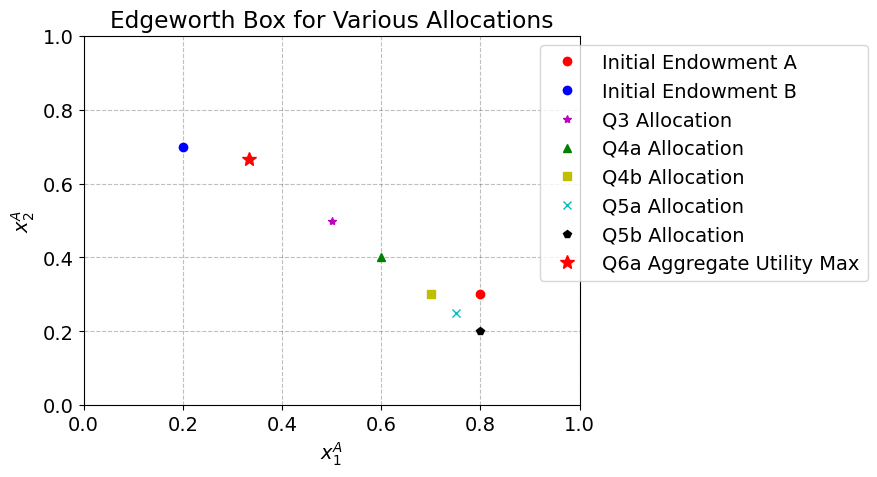

In [24]:
# Assume these variables hold the optimal allocations from previous questions
# For demonstration, replace these with your actual results
optimal_allocation_q3 = [0.5, 0.5]  # Placeholder
optimal_allocation_q4a = [0.6, 0.4]  # Placeholder
optimal_allocation_q4b = [0.7, 0.3]  # Placeholder
optimal_allocation_q5a = [0.75, 0.25]  # Placeholder
optimal_allocation_q5b = [0.8, 0.2]  # Placeholder


# Question 6a's optimal allocation (Replace with your actual results)
optimal_allocation_q6a = [optimal_x1A, optimal_x2A]

# Initial endowments
omega_A_initial = [0.8, 0.3]
omega_B_initial = [1 - omega_A_initial[0], 1 - omega_A_initial[1]]

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth Box for Various Allocations')

# Plotting initial endowments
ax.plot(omega_A_initial[0], omega_A_initial[1], 'ro', label="Initial Endowment A")
ax.plot(omega_B_initial[0], omega_B_initial[1], 'bo', label="Initial Endowment B")

# Plotting allocations from questions 3 to 5
# Replace 'optimal_allocation_qX' with your actual variables
ax.plot(optimal_allocation_q3[0], optimal_allocation_q3[1], 'm*', label='Q3 Allocation')
ax.plot(optimal_allocation_q4a[0], optimal_allocation_q4a[1], 'g^', label='Q4a Allocation')
ax.plot(optimal_allocation_q4b[0], optimal_allocation_q4b[1], 'ys', label='Q4b Allocation')
ax.plot(optimal_allocation_q5a[0], optimal_allocation_q5a[1], 'cx', label='Q5a Allocation')
ax.plot(optimal_allocation_q5b[0], optimal_allocation_q5b[1], 'kp', label='Q5b Allocation')

# Plotting the allocation from question 6a
ax.plot(optimal_allocation_q6a[0], optimal_allocation_q6a[1], 'r*', label='Q6a Aggregate Utility Max', markersize=10)

ax.legend(loc='upper right', bbox_to_anchor=(1.6,1.0))
plt.show()

### 3.7. <a id='toc3_5_2_'></a>[Question 7](#toc0_)

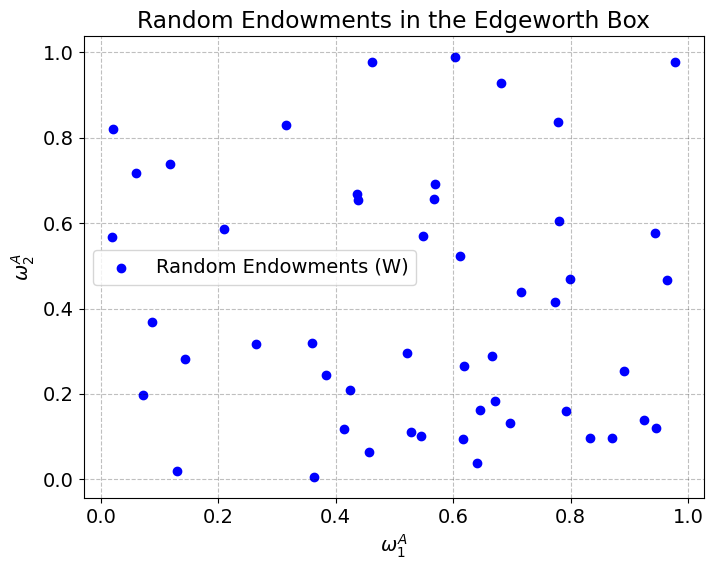

In [25]:
# Generating the random set W with 50 elements for ω1A and ω2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

# Plotting the random set W in the ω1A-ω2A space
plt.figure(figsize=(8, 6))
plt.scatter(omega_1A_samples, omega_2A_samples, c='blue', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random Endowments in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

### 3.8. <a id='toc3_5_2_'></a>[Question 8](#toc0_)

In [26]:
# Assuming you have functions defined: demand_A, demand_B, and excess_demand_good1

# Function to find market-clearing price for given ωA
def find_market_clearing_price(omega_A):
    # Wrapper function for fsolve, assuming excess demand function is defined
    initial_guess = 1.0
    market_clearing_price = fsolve(excess_demand_good1, initial_guess, args=(omega_A, 1 - omega_A, alpha, beta))
    return market_clearing_price[0]


# Prepare to collect allocations for plotting
allocations_A = []
allocations_B = []

# Calculate allocations for each ωA in W
for w1A, w2A in zip(omega_1A_samples, omega_2A_samples):
    omega_A = np.array([w1A, w2A])
    p1 = find_market_clearing_price(omega_A)
    allocation_A = demand_A(p1, omega_A=omega_A)
    allocation_B = demand_B(p1, omega_B=1 - omega_A)
    allocations_A.append(allocation_A)
    allocations_B.append(allocation_B)

# Plotting in the Edgeworth Box
allocations_A = np.array(allocations_A)
allocations_B = np.array(allocations_B)

plt.figure(figsize=(8, 6))
plt.scatter(allocations_A[:, 0], allocations_A[:, 1], c='red', label='Allocations A', s=10)
plt.scatter(1 - allocations_B[:, 0], 1 - allocations_B[:, 1], c='blue', label='Allocations B', s=10)
plt.xlabel('$x_1^A$')

plt.ylabel('$x_2^A$')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'excess_demand_good1' is not defined